In [1]:
"""
    Import Library
"""
##-- Pandas
import pandas as pd
##-- NumPy
import numpy as np
##-- Matplotlib
import matplotlib.pylab as plt
import seaborn as sns
##-- Scikit-learn
import sklearn

In [4]:
"""
    Model Function
"""
def func(param, X):
    """
        y = w0 + w1*x + w2*x^2 + w3*exp(x)
    """
    return param[0] + param[1]*X + param[2]*np.power(X, 2) + param[3]*np.exp(X)

In [5]:
##-- Set Random Seed
np.random.seed(seed=99)

##-- x range
x = np.arange(0, 1, 0.01)
##-- w0, w1, w2, w3 for model function
param = [-1.0, 1.0, 2.0, 3.0]

y_model = func(param, x)
y_train = func(param, x) + np.random.normal(loc=0, scale=1.0, size=len(x))

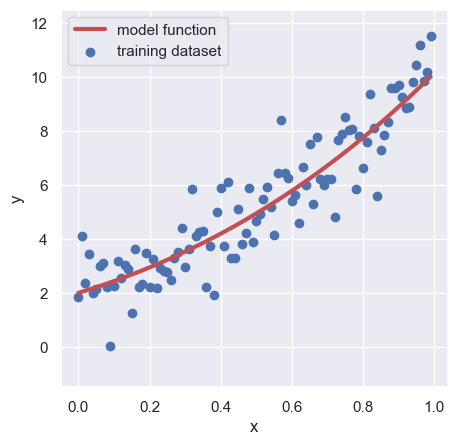

In [7]:
"""
    Visualize the toy dataset
"""
plt.figure(figsize=(5, 5), dpi=100)
sns.set()
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1.5, 12.5)
plt.scatter(x, y_train, lw=1, color="b", label="training dataset")
plt.plot(x, y_model, lw=3, color="r", label="model function")
plt.savefig("example.png")
plt.legend()
plt.show()

In [8]:
"""
    Import GPy
"""
import GPy
print(GPy.__version__)

1.9.9


In [13]:
##-- Define Kernel
kernel = GPy.kern.Matern52(input_dim=1, ARD=True)
##-- Define model
model = GPy.models.GPRegression(x.reshape(-1, 1), y_train.reshape(-1, 1), kernel=kernel)
##-- Fit the model
model.optimize(messages=False)

{'dataplot': [<matplotlib.collections.PathCollection at 0x126dfe290>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x129593710>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1295939d0>]}

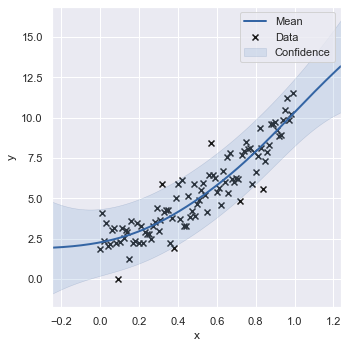

In [15]:
"""
    Quick check
"""
model.plot(figsize=(5, 5), dpi=100, xlabel="x", ylabel="y")

In [16]:
"""
    Create the test data
"""
x_test = np.arange(0, 2, 0.01)
y_mean, y_std = model.predict(x_test.reshape(-1, 1))

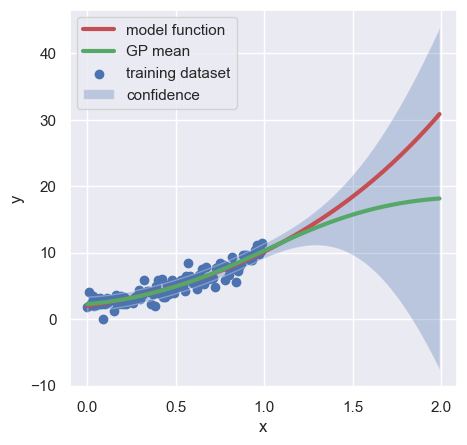

In [17]:
"""
    Predict the test data
"""
plt.figure(figsize=(5, 5), dpi=100)
sns.set()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y_train, lw=1, color="b", label="training dataset")
plt.plot(x_test, func(param, x_test), lw=3, color="r", label="model function")
plt.plot(x_test, y_mean, lw=3, color="g", label="GP mean")
plt.fill_between(x_test, (y_mean + y_std).reshape(y_mean.shape[0]), (y_mean - y_std).reshape(y_mean.shape[0]), facecolor="b", alpha=0.3, label="confidence")
plt.savefig("example.png")
plt.legend(loc="upper left")
plt.show()